In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import math
from matplotlib.mlab import PCA as mlabPCA
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA 

pd.options.display.max_rows = 3000

In [2]:
%time

#https://www.kaggle.com/c/home-credit-default-risk/data
#TARGET 1=DEFAULT  0=NODEFAULT

df = pd.read_csv('application_train.csv')

df.head()

CPU times: user 2 µs, sys: 1 µs, total: 3 µs
Wall time: 5.96 µs


,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0


In [3]:
features = df   #make a copy of df

#Remove Columns that have a large number of NAs
#Count the number of NAs in a column and remove columns over a particular threshold
print('Columns with over 1/3 of the values N/A')
print('Removing these columns \n')
series_cols = features.isnull().sum(axis = 0).sort_values(ascending=False)
series_cols = series_cols[series_cols > 100000]
list_colstodrop = series_cols.index.tolist()
print(series_cols)
features = features.drop(labels = list_colstodrop, axis=1)
features.shape

Columns with over 1/3 of the values N/A
Removing these columns 

COMMONAREA_MEDI                 214865
COMMONAREA_AVG                  214865
COMMONAREA_MODE                 214865
NONLIVINGAPARTMENTS_MODE        213514
NONLIVINGAPARTMENTS_MEDI        213514
NONLIVINGAPARTMENTS_AVG         213514
FONDKAPREMONT_MODE              210295
LIVINGAPARTMENTS_MEDI           210199
LIVINGAPARTMENTS_MODE           210199
LIVINGAPARTMENTS_AVG            210199
FLOORSMIN_MEDI                  208642
FLOORSMIN_MODE                  208642
FLOORSMIN_AVG                   208642
YEARS_BUILD_MEDI                204488
YEARS_BUILD_AVG                 204488
YEARS_BUILD_MODE                204488
OWN_CAR_AGE                     202929
LANDAREA_MODE                   182590
LANDAREA_AVG                    182590
LANDAREA_MEDI                   182590
BASEMENTAREA_MEDI               179943
BASEMENTAREA_AVG                179943
BASEMENTAREA_MODE               179943
EXT_SOURCE_1                    173378

(307511, 73)

In [4]:
#Drop Rows with an NA in any column
features.dropna(inplace=True)
features.shape

(167732, 73)

In [5]:
# Make a correlation matrix.
corrmat = features.corr()

#Convert Matrix into stacked pairs
corrmat['Col'] = corrmat.index
df_corr = pd.melt(corrmat, id_vars=['Col'])
df_corr = df_corr[0:df_corr['Col'].size//2]

df_corr

,Col,variable,value
0,SK_ID_CURR,SK_ID_CURR,1.000000
1,TARGET,SK_ID_CURR,-0.004280
2,CNT_CHILDREN,SK_ID_CURR,-0.000784
3,AMT_INCOME_TOTAL,SK_ID_CURR,-0.003021
4,AMT_CREDIT,SK_ID_CURR,-0.002712
5,AMT_ANNUITY,SK_ID_CURR,-0.003114
6,AMT_GOODS_PRICE,SK_ID_CURR,-0.002000
7,REGION_POPULATION_RELATIVE,SK_ID_CURR,0.000750
8,DAYS_BIRTH,SK_ID_CURR,-0.003125
9,DAYS_EMPLOYED,SK_ID_CURR,-0.001447


In [6]:
#Identify pairs with a correlation above a threshold

threshold = .75
list_colsflagged = []
list_colsflagged = df_corr.loc[(abs(df_corr['value']) > threshold) & (df_corr['Col'] != df_corr['variable'])].sort_values('variable')
print(list_colsflagged)
#list_colsflagged = list_colsflagged['Col'].unique().tolist()

#features = features.drop(labels = list_colstodrop, axis=1)
#features.shape

                              Col                     variable     value
309                    AMT_CREDIT                  AMT_ANNUITY  0.762813
311               AMT_GOODS_PRICE                  AMT_ANNUITY  0.766606
249                   AMT_ANNUITY                   AMT_CREDIT  0.762813
250               AMT_GOODS_PRICE                   AMT_CREDIT  0.986369
370                    AMT_CREDIT              AMT_GOODS_PRICE  0.986369
371                   AMT_ANNUITY              AMT_GOODS_PRICE  0.766606
140               CNT_FAM_MEMBERS                 CNT_CHILDREN  0.896513
1100                 CNT_CHILDREN              CNT_FAM_MEMBERS  0.896513
1673       REG_CITY_NOT_WORK_CITY      LIVE_CITY_NOT_WORK_CITY  0.821544
1487   REG_REGION_NOT_WORK_REGION  LIVE_REGION_NOT_WORK_REGION  0.865329
1179  REGION_RATING_CLIENT_W_CITY         REGION_RATING_CLIENT  0.950572
1239         REGION_RATING_CLIENT  REGION_RATING_CLIENT_W_CITY  0.950572
1613      LIVE_CITY_NOT_WORK_CITY       REG_CITY_NO

In [7]:
#Data Cleaning and Feature Engineering

#Change Feature to binary
features['FLAG_OWN_CAR'] = np.where((features['FLAG_OWN_CAR'].isin(['Y'])), 1, 0)
features['FLAG_OWN_REALTY'] = np.where((features['FLAG_OWN_REALTY'].isin(['Y'])), 1, 0)


#Categorize features
features['NAME_FAMILY_STATUS'] = features['NAME_FAMILY_STATUS'].str.replace('Separated','Single / not married')
features['NAME_FAMILY_STATUS'] = features['NAME_FAMILY_STATUS'].str.replace('Widow','Single / not married')
features['NAME_FAMILY_STATUS'] = features['NAME_FAMILY_STATUS'].str.replace('Civil marriage','Married')
features['NAME_FAMILY_STATUS'] = features['NAME_FAMILY_STATUS'].str.replace('Single / not married','Not Married')

                              
#Create new features
features['AGE'] = abs(features['DAYS_BIRTH']) / 365 
features['MY_LIVE_REG_NO_CAR'] = np.where(((features['LIVE_CITY_NOT_WORK_CITY'] == 0) | (features['LIVE_REGION_NOT_WORK_REGION'] == 1)) & ((features['FLAG_OWN_CAR'] == 1)), 1, 0)
features['MY_CREDIT_TO_GOODS'] =  round(features.AMT_GOODS_PRICE / features.AMT_CREDIT,2)
features['MY_INCOME_TO_GOODS'] = round(features.AMT_INCOME_TOTAL / features.AMT_GOODS_PRICE,2)



#Remove outliers
features = features[features.AMT_INCOME_TOTAL < 400000]
features = features[features.REGION_POPULATION_RELATIVE < .07]
features = features[(features.HOUR_APPR_PROCESS_START > 2) & (features.HOUR_APPR_PROCESS_START < 23)]
features = features[features.MY_CREDIT_TO_GOODS < 3]
features = features[features.CNT_CHILDREN < 6]
features = features[features.AMT_GOODS_PRICE < 2000000]
features = features[features.MY_INCOME_TO_GOODS < 5]

#Drop Features with high correlations to other features as reviewed in step above
features = features.drop(labels = ['AMT_ANNUITY','AMT_CREDIT','CNT_FAM_MEMBERS','REG_CITY_NOT_WORK_CITY','REG_REGION_NOT_WORK_REGION',
                                  'REGION_RATING_CLIENT_W_CITY','REGION_RATING_CLIENT'], axis=1)




In [8]:
temp_series = features.max()
list_binary_cols = temp_series[features.max() == 1].index.drop(labels=['TARGET']).tolist()

list_category_cols = features.select_dtypes(include=[np.object]).dropna().columns.tolist()
list_category_cols.append('TARGET')

list_continuous_cols = features.select_dtypes(include=[np.number]).dropna().columns
list_continuous_cols = list_continuous_cols.drop(labels=list_binary_cols).drop(labels=['TARGET','SK_ID_CURR'])
list_continuous_cols = list_continuous_cols.drop(labels=['OBS_30_CNT_SOCIAL_CIRCLE', 'DEF_30_CNT_SOCIAL_CIRCLE', 'OBS_60_CNT_SOCIAL_CIRCLE', 'DEF_60_CNT_SOCIAL_CIRCLE']).tolist()

print('\n----- BINARY COLUMNS -----\n')
print(list_binary_cols)
print('\n----- CATEGORY COLUMNS -----\n')
print(list_category_cols)
print('\n----- CONTINUOUS COLUMNS -----\n')
print(list_continuous_cols)





----- BINARY COLUMNS -----

['FLAG_OWN_CAR', 'FLAG_OWN_REALTY', 'FLAG_MOBIL', 'FLAG_EMP_PHONE', 'FLAG_WORK_PHONE', 'FLAG_CONT_MOBILE', 'FLAG_PHONE', 'FLAG_EMAIL', 'REG_REGION_NOT_LIVE_REGION', 'LIVE_REGION_NOT_WORK_REGION', 'REG_CITY_NOT_LIVE_CITY', 'LIVE_CITY_NOT_WORK_CITY', 'FLAG_DOCUMENT_3', 'FLAG_DOCUMENT_4', 'FLAG_DOCUMENT_5', 'FLAG_DOCUMENT_6', 'FLAG_DOCUMENT_7', 'FLAG_DOCUMENT_8', 'FLAG_DOCUMENT_9', 'FLAG_DOCUMENT_10', 'FLAG_DOCUMENT_11', 'FLAG_DOCUMENT_12', 'FLAG_DOCUMENT_13', 'FLAG_DOCUMENT_14', 'FLAG_DOCUMENT_15', 'FLAG_DOCUMENT_16', 'FLAG_DOCUMENT_17', 'FLAG_DOCUMENT_18', 'FLAG_DOCUMENT_19', 'FLAG_DOCUMENT_20', 'FLAG_DOCUMENT_21', 'MY_LIVE_REG_NO_CAR']

----- CATEGORY COLUMNS -----

['NAME_CONTRACT_TYPE', 'CODE_GENDER', 'NAME_TYPE_SUITE', 'NAME_INCOME_TYPE', 'NAME_EDUCATION_TYPE', 'NAME_FAMILY_STATUS', 'NAME_HOUSING_TYPE', 'OCCUPATION_TYPE', 'WEEKDAY_APPR_PROCESS_START', 'ORGANIZATION_TYPE', 'TARGET']

----- CONTINUOUS COLUMNS -----

['CNT_CHILDREN', 'AMT_INCOME_TOTAL', 'AM

In [9]:
for column in list_continuous_cols:
    print(column)
    print('mean: ' + str(features[column].mean()))
    print('std: ' + str(features[column].std()))
    corr_to_target = features['TARGET'].corr(features[column])
    print('corr to target: ' + str(corr_to_target))
    if abs(corr_to_target) > .10:
        print ('*****HIGH CORRELATION. INSPECT.')
    print('\n')



CNT_CHILDREN
mean: 0.512185133381217
std: 0.7621565056209549
corr to target: 0.007851527024739145


AMT_INCOME_TOTAL
mean: 165229.6444100858
std: 69021.32535247783
corr to target: -0.022889653241588447


AMT_GOODS_PRICE
mean: 537177.9751729482
std: 349918.72269580024
corr to target: -0.041870605699722535


REGION_POPULATION_RELATIVE
mean: 0.019295635321765647
std: 0.010867490665827931
corr to target: -0.02540266588868597


DAYS_BIRTH
mean: -14851.656314973727
std: 3601.1278836230717
corr to target: 0.0679845880595004


DAYS_EMPLOYED
mean: -2470.0150266510414
std: 2398.7816649302367
corr to target: 0.07663971032304222


DAYS_REGISTRATION
mean: -4626.311407653826
std: 3239.3455394236075
corr to target: 0.03690374077378364


DAYS_ID_PUBLISH
mean: -2870.6668493806624
std: 1498.117779565191
corr to target: 0.03754983161734092


HOUR_APPR_PROCESS_START
mean: 12.179084917904712
std: 3.2350200349839353
corr to target: -0.02349987052257345


EXT_SOURCE_2
mean: 0.5142900848472882
std: 0.18802930

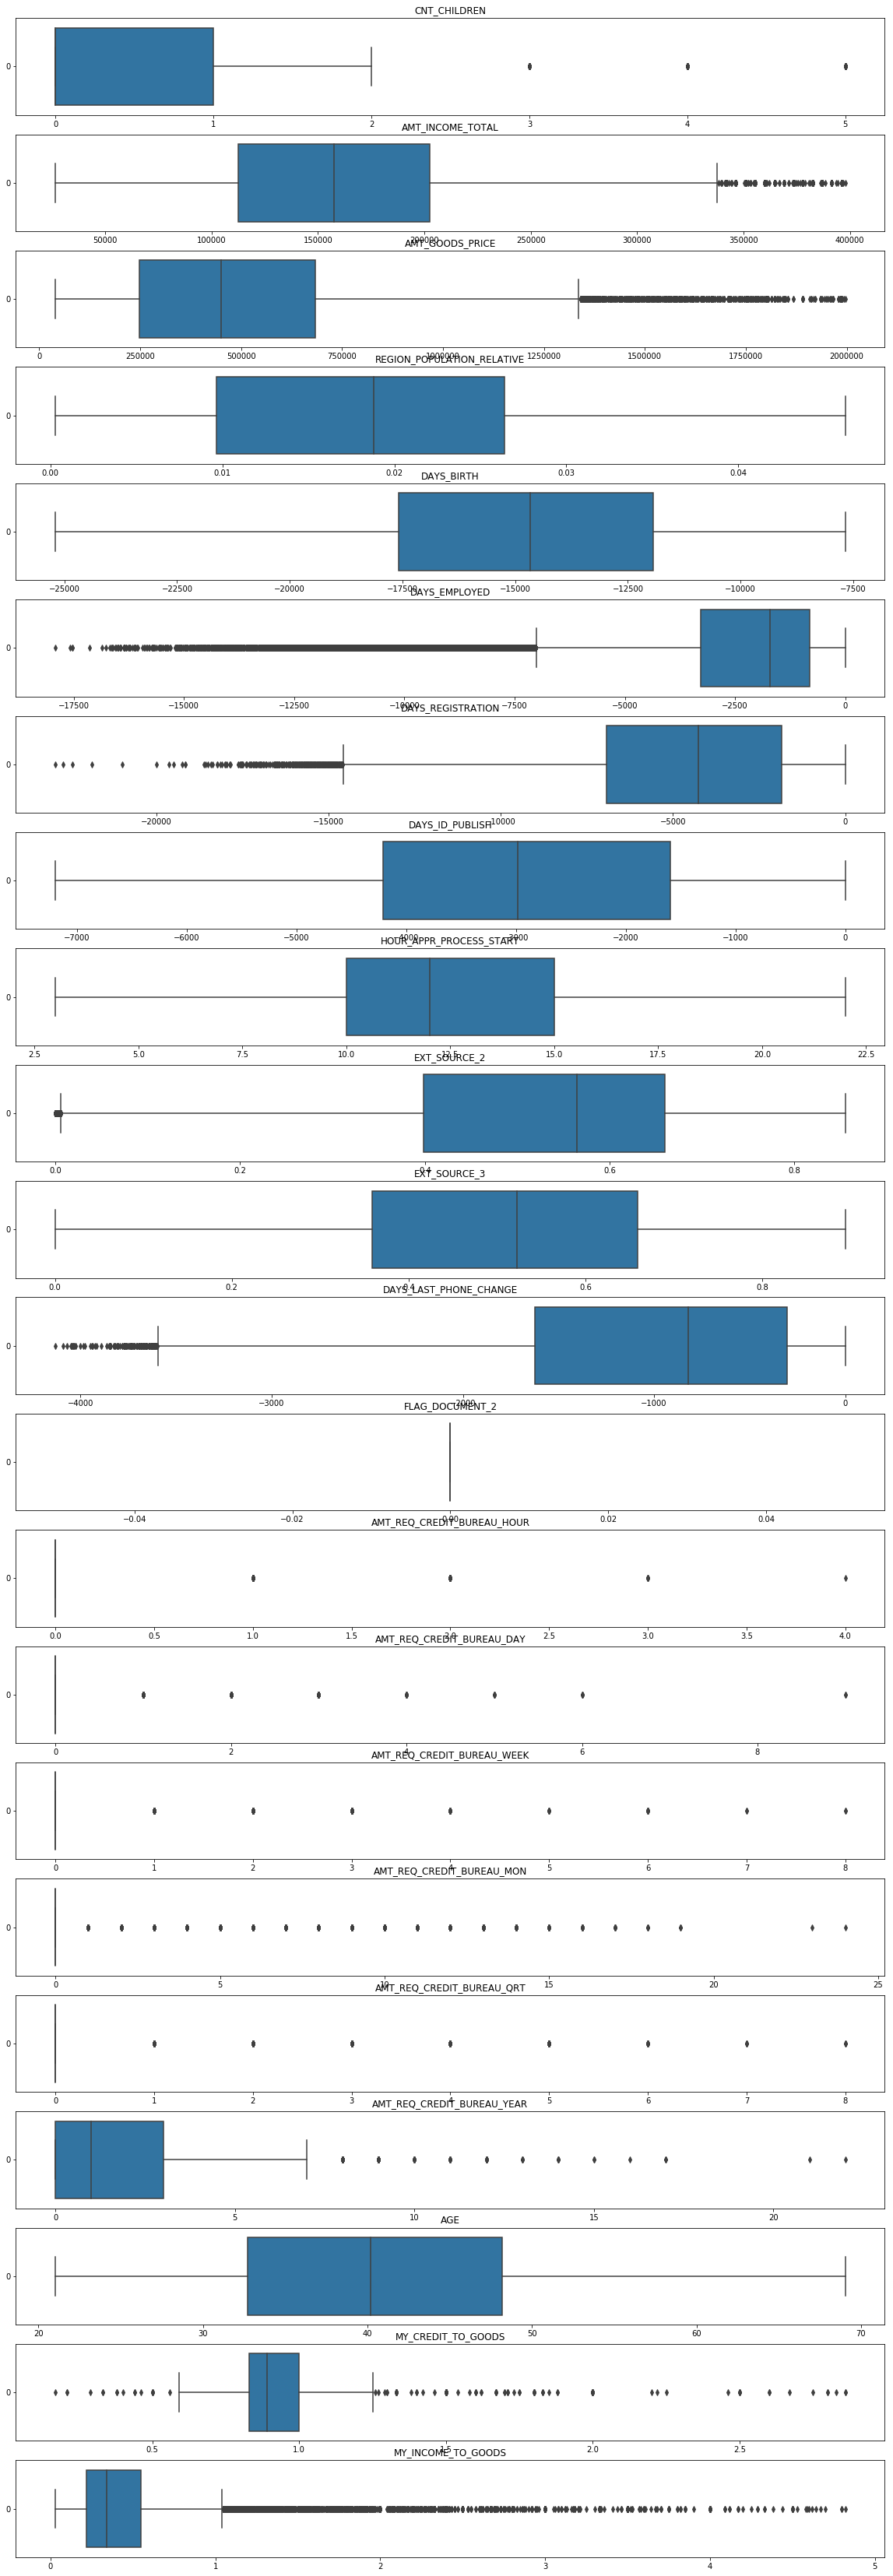

In [10]:
#Draw boxplots for several columns of continuous data
#The column names are stored in list_interested_features_continuous
f, axes = plt.subplots(len(list_continuous_cols), 1, sharey=False, sharex=False , figsize=(20, 60) )


i = 0
for column in list_continuous_cols:
    plt.subplot(axes[i])
    plt.title(column)
    sns.boxplot(data=features[column], orient="h", ax=axes[i] )
    i = i + 1


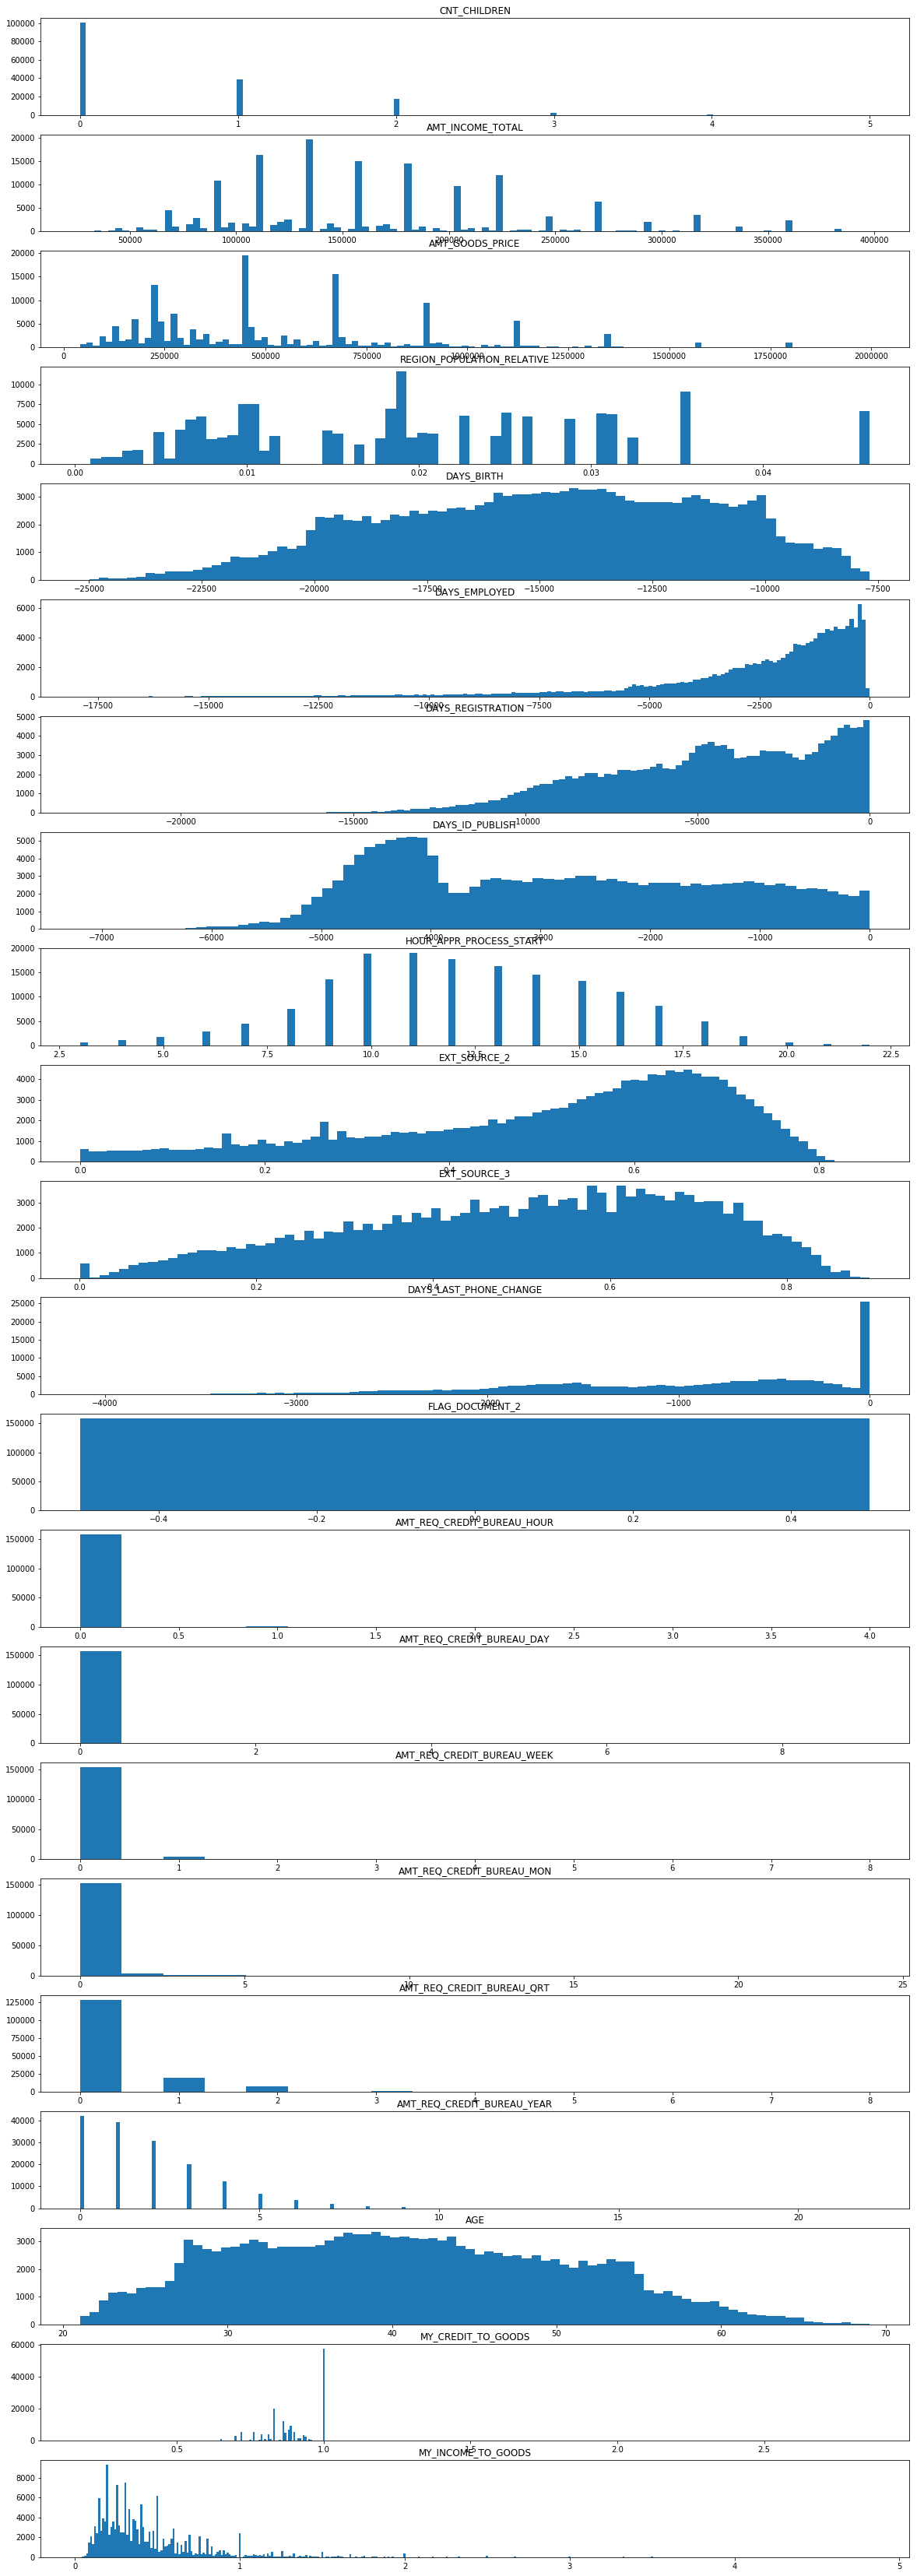

In [11]:
#Draw historgrams for several columns of continuous data
#The column names are stored in list_interested_features_continuous
f, axes = plt.subplots(len(list_continuous_cols), 1, sharey=False, sharex=False , figsize=(20, 60) )

i = 0
for column in list_continuous_cols:
    plt.subplot(axes[i])
    plt.title(column)
    plt.hist(features[column], bins='auto')
    i = i + 1

In [21]:
#for column in list_binary_cols:
#    counttable = pd.crosstab(features[column], features.TARGET, normalize='index' )
#    print(counttable)
#    counttable = pd.crosstab(features[column], features.TARGET )
#    print(counttable)
#    print('\n')
    
    
for column in list_binary_cols:
    print(column)
    print('mean: ' + str(features[column].mean()))
    print('std: ' + str(features[column].std()))
    corr_to_target = features['TARGET'].corr(features[column])
    print('corr to target: ' + str(corr_to_target))
    if abs(corr_to_target) > .03:
        print ('*******HIGH CORRELATION. INSPECT.******')
    counttable = pd.crosstab(features[column], features.TARGET )
    print(counttable)
    print('\n')

FLAG_OWN_CAR
mean: 0.3822187779583916
std: 0.4859311386004147
corr to target: -0.03020257842692989
*******HIGH CORRELATION. INSPECT.******
TARGET            0     1
FLAG_OWN_CAR             
0             88925  9128
1             56077  4588


FLAG_OWN_REALTY
mean: 0.6790912183873284
std: 0.46682727913681493
corr to target: -0.0025176841862936034
TARGET               0     1
FLAG_OWN_REALTY             
0                46480  4454
1                98522  9262


FLAG_MOBIL
mean: 1.0
std: 0.0
corr to target: nan
TARGET           0      1
FLAG_MOBIL               
1           145002  13716


FLAG_EMP_PHONE
mean: 0.9999621971042982
std: 0.006148309101848356
corr to target: -0.0017560511318905595
TARGET               0      1
FLAG_EMP_PHONE               
0                    5      1
1               144997  13715


FLAG_WORK_PHONE
mean: 0.24423190816416537
std: 0.4296322219829074
corr to target: 0.017177171802896452
TARGET                0      1
FLAG_WORK_PHONE               
0         

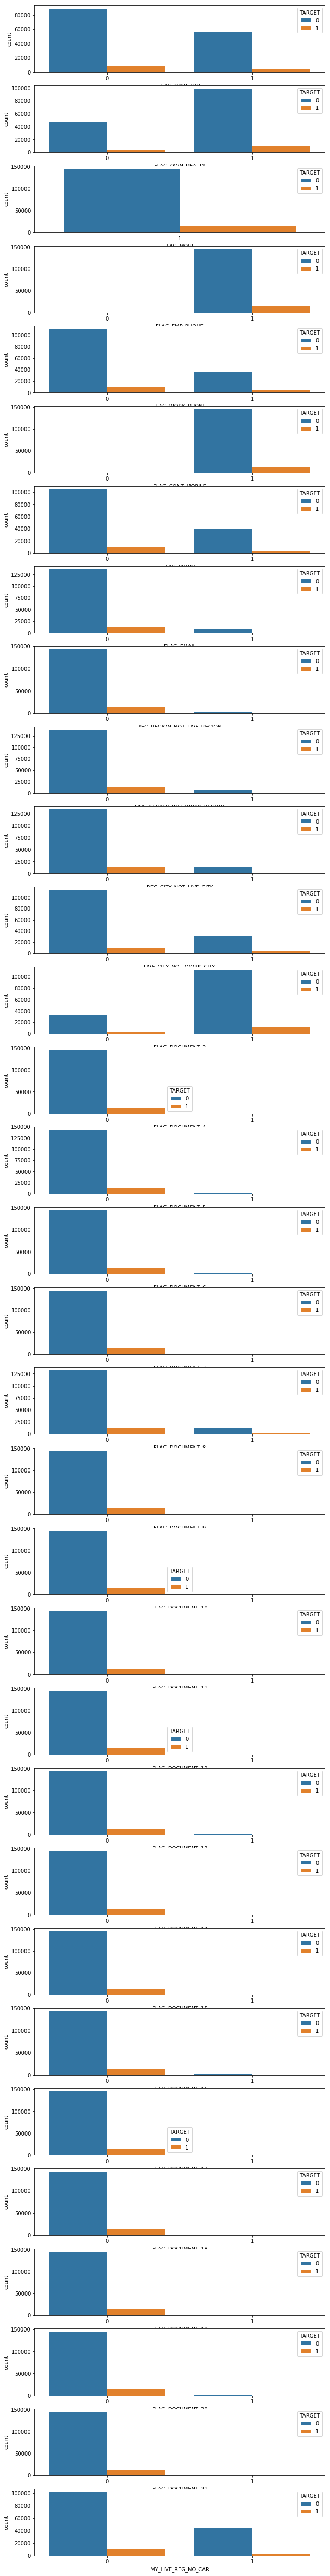

In [13]:
f, axes = plt.subplots(len(list_binary_cols), 1, sharey=False, sharex=False , figsize=(10, 90) )


i = 0
for column in list_binary_cols:
    plt.subplot(axes[i])
    #plt.title(column)
    sns.countplot(data=features, x=column, orient='h', hue='TARGET', ax=axes[i] )
    i = i + 1

In [14]:
for column in list_category_cols:
    counttable = pd.crosstab(features[column], features.TARGET, normalize='index' )
    print(counttable)
    print('\n')
    

TARGET                     0         1
NAME_CONTRACT_TYPE                    
Cash loans          0.910434  0.089566
Revolving loans     0.943160  0.056840


TARGET              0         1
CODE_GENDER                    
F            0.923733  0.076267
M            0.896640  0.103360
XNA          1.000000  0.000000


TARGET                  0         1
NAME_TYPE_SUITE                    
Children         0.927778  0.072222
Family           0.922120  0.077880
Group of people  0.918519  0.081481
Other_A          0.902326  0.097674
Other_B          0.906499  0.093501
Spouse, partner  0.914035  0.085965
Unaccompanied    0.912148  0.087852


TARGET                       0         1
NAME_INCOME_TYPE                        
Businessman           1.000000  0.000000
Commercial associate  0.922108  0.077892
Pensioner             1.000000  0.000000
State servant         0.942404  0.057596
Student               1.000000  0.000000
Working               0.906160  0.093840


TARGET                  

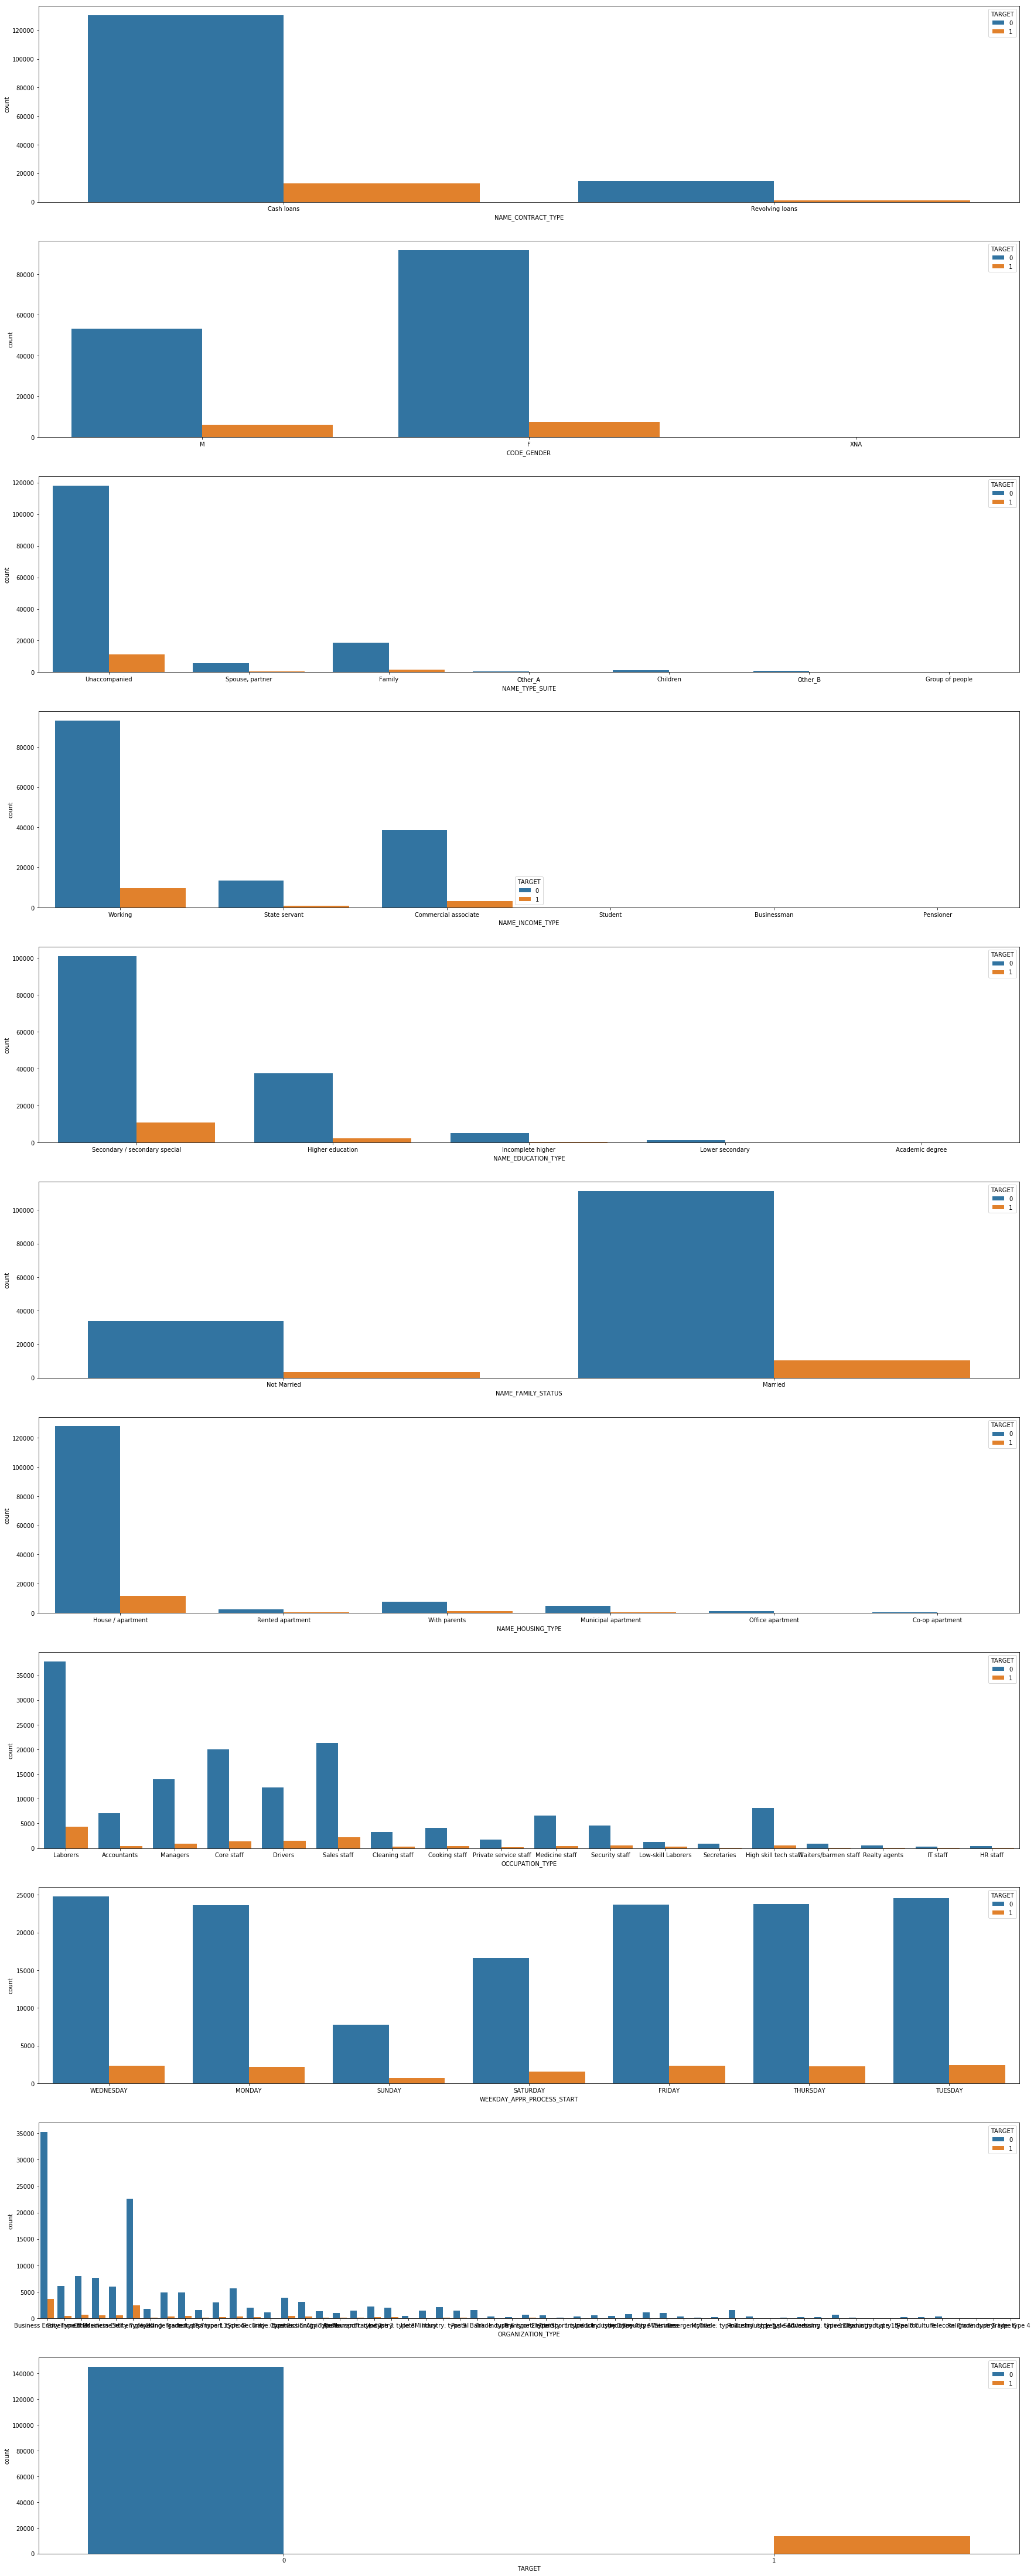

In [15]:
f, axes = plt.subplots(len(list_category_cols), 1, sharey=False, sharex=False , figsize=(30, 80) )


i = 0
for column in list_category_cols:
    #plt.subplot(axes[i])
    #plt.title(column)
    sns.countplot(data=features, x=column, orient='h', hue='TARGET', ax=axes[i] )
    i = i + 1

In [16]:
list_features_continuous = [
'MY_GOODS_PRICE',   #Fairly normal distribution.   Makes logical sense.  Cannot lie about like income.
'AGE',              #Normal distribution.  Makes logical sense.
'DAYS_EMPLOYED',   #Normal distribution.  Makes logical sense.
'EXT_SOURCE_2'    #Very normal distribution.  High independent correlation to Target.
'EXT_SOURCE_3'    #Very normal distribution.  High independent correlation to Target.
]

list_features_binary = [
'FLAG_OWN_CAR',    #3% Correlation with Target.  Makes sense.
]

list_features_categorical = [
'CODE_GENDER',           #Males appear to default more often than females
'NAME_EDUCATION_TYPE'    #Higher educated appear to default less
]

In [17]:
# Making a four-panel plot.
#fig = plt.figure()

#column = 'DAYS_EMPLOYED'

#fig.add_subplot(221)
#plt.hist(features[column].dropna())
#plt.title('Raw')

#fig.add_subplot(222)
#plt.hist(np.log(features[column].dropna()))
#plt.title('Log')

#fig.add_subplot(223)
#plt.hist(np.sqrt(features[column].dropna()))
#plt.title('Square root')

#ax3=fig.add_subplot(224)
#plt.hist(1/features[column].dropna())
#plt.title('Inverse')
#plt.show()